<a href="https://colab.research.google.com/github/prasad-dash/Word-Prediction-using-RNN/blob/main/WordPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
!wget  https://www.gutenberg.org/files/64771/64771-0.txt -O dataO.txt


--2021-03-11 08:41:48--  https://www.gutenberg.org/files/64771/64771-0.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138000 (135K) [text/plain]
Saving to: ‘dataO.txt’

dataO.txt           100%[===================>] 134.77K   104KB/s    in 1.3s    

2021-03-11 08:41:51 (104 KB/s) - ‘dataO.txt’ saved [138000/138000]



In [ ]:
file=open("/content/data_mod.txt","r",encoding="utf-8")

In [ ]:
sentences=[]
for sentence in file:
  sentences.append(sentence)

In [ ]:
data = ""

for i in sentences:
    data = ' '. join(sentences)
    
list_lines=[]
list_lines=data.split(".")
list_lines=[sentence+" ." for sentence in list_lines]
list_lines=[sentence.replace('\n','') for sentence in list_lines]
final_list="".join(list_lines)
print(final_list)

The Mizar, a glittering needle with stubby, backswept wings, hurtled out of deep space, arced into orbital flight a thousand kilometers above the surface of the planet . The starship had approached from the night side . Now, as it decelerated rapidly, it flashed into the raw orange daylight of the planet's K1 type sun, angled downward into the stratosphere .  Inside the Mizar's control blister, Jupiter Jones lifted red-rimmed eyes to the fuel gauge . It showed only a few centigrams left . Little more than enough to land .  He swore under his breath, hunched lower over the controls, a long, loose-framed man with a shock of red hair and vivid green eyes . The olive uniform of the Galactic Colonization Board was wrinkled as if it had been slept in, and he had allowed his beard to grow . The bushy orange-red mass of it hid his face almost to the eyes .  He was alone in the ship . He'd been alone, operating the Mizar single-handed since Briggs, his co-pilot, had gone crazy and killed himsel

In [ ]:
tokeniser=tf.keras.preprocessing.text.Tokenizer()
tokeniser.fit_on_texts([final_list])
token_list=tokeniser.texts_to_sequences([final_list])[0]
vocab_size=len(tokeniser.word_index)+1

In [ ]:
X=[]
Y=[]
for i in range(8,len(token_list)):
  x=token_list[i-8:i]
  X.append(x)
  Y.append(token_list[i])
X=np.array(X)
Y=np.array(Y)
print(len(X))
Y=tf.keras.utils.to_categorical(Y,vocab_size)
#tf.keras.utils.to_categorical()

19854


In [ ]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=vocab_size,output_dim=10,input_length=8))
model.add(tf.keras.layers.LSTM(1000,return_sequences=True))
model.add(tf.keras.layers.LSTM(1000))
model.add(tf.keras.layers.Dense(1000,activation="relu"))
model.add(tf.keras.layers.Dense(vocab_size,activation="softmax"))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 8, 10)             35820     
_________________________________________________________________
lstm_2 (LSTM)                (None, 8, 1000)           4044000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 1000)              8004000   
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_3 (Dense)              (None, 3582)              3585582   
Total params: 16,670,402
Trainable params: 16,670,402
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

In [ ]:
!tensorboard --logdir "/content/logsnextword1" 

2021-03-11 10:00:45.653893: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
W0311 10:00:47.004154 140641884047104 plugin_event_accumulator.py:322] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.4.1 at http://localhost:6006/ (Press CTRL+C to quit)
^C


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=tf.optimizers.Adam(lr=0.001))
model.fit(X, Y, epochs=20, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])

Epoch 1/20
311/311 [==============================] - 12s 31ms/step - loss: 6.9681

Epoch 00001: loss improved from inf to 6.75824, saving model to nextword1.h5
Epoch 2/20
311/311 [==============================] - 9s 28ms/step - loss: 6.4383

Epoch 00002: loss improved from 6.75824 to 6.47821, saving model to nextword1.h5
Epoch 3/20
311/311 [==============================] - 9s 28ms/step - loss: 6.3162

Epoch 00003: loss improved from 6.47821 to 6.28984, saving model to nextword1.h5
Epoch 4/20
311/311 [==============================] - 9s 28ms/step - loss: 5.9905

Epoch 00004: loss improved from 6.28984 to 6.02336, saving model to nextword1.h5
Epoch 5/20
311/311 [==============================] - 9s 29ms/step - loss: 5.8138

Epoch 00005: loss improved from 6.02336 to 5.80519, saving model to nextword1.h5
Epoch 6/20
311/311 [==============================] - 9s 29ms/step - loss: 5.6070

Epoch 00006: loss improved from 5.80519 to 5.58777, saving model to nextword1.h5
Epoch 7/20
311/311 

In [ ]:
histoy=model.fit(X, Y, epochs=20, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])

Epoch 1/20
311/311 [==============================] - 9s 30ms/step - loss: 0.1622

Epoch 00001: loss improved from 0.34502 to 0.16217, saving model to nextword1.h5
Epoch 2/20
311/311 [==============================] - 9s 28ms/step - loss: 0.0681

Epoch 00002: loss improved from 0.16217 to 0.06805, saving model to nextword1.h5
Epoch 3/20
311/311 [==============================] - 9s 29ms/step - loss: 0.0480

Epoch 00003: loss improved from 0.06805 to 0.04804, saving model to nextword1.h5
Epoch 4/20
311/311 [==============================] - 9s 29ms/step - loss: 0.0425

Epoch 00004: loss improved from 0.04804 to 0.04246, saving model to nextword1.h5
Epoch 5/20
311/311 [==============================] - 9s 28ms/step - loss: 0.0952

Epoch 00005: loss did not improve from 0.04246
Epoch 6/20
311/311 [==============================] - 9s 28ms/step - loss: 0.2004

Epoch 00006: loss did not improve from 0.04246
Epoch 7/20
311/311 [==============================] - 9s 28ms/step - loss: 0.1720

E

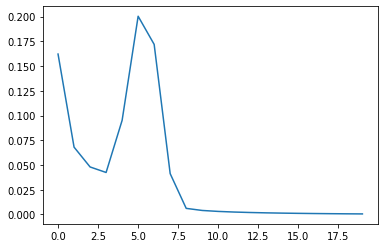

In [ ]:
plt.plot(histoy.history['loss'])

In [ ]:
test_string="Mizar single-handed since briggs his co pilot"
x=tokeniser.texts_to_sequences([test_string])
print(x)
y=model.predict(x)

[[96, 501, 1679, 240, 336, 7, 768, 606]]


In [ ]:
print(y.sum())

1.0000001


In [ ]:
y.argmax()

12

In [ ]:
tokeniser.index_word[y.argmax()]

'had'